Preprocessing

In [2]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from spellchecker import SpellChecker
from bs4 import BeautifulSoup             
from wordcloud import WordCloud, STOPWORDS
import re
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
import operator
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fatma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#Read the dataset
data = pd.read_csv('IMDB Dataset.csv', delimiter=',')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
X = data.review
y = data.sentiment
X_train, X_test, y_train, y_test = train_test_split(data.review, data.sentiment, test_size=0.3, random_state=2)


In [7]:
# convert the target label to a number 
y = y.apply(lambda x: 1 if x=='positive' else 0)

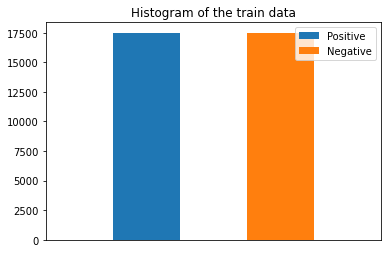

In [8]:
plt.hist(y_train[y_train == "positive"],
         bins=2,  label='Positive')
plt.hist(y_train[y_train == "negative"],
         bins=2, label='Negative')
plt.title('Histogram of the train data')
plt.xticks([])
plt.xlim(-0.5, 2)
plt.legend()
plt.show()

In [9]:
def preprocessing_raw_review(raw_review, stop_words=set(STOPWORDS)):
    # convert a raw review to a processed string of words

    # Remove HTML
    no_html = BeautifulSoup(raw_review,).get_text() 
    
    # Keep only letters        
    letters = re.sub("[^a-zA-Z]", " ", no_html) 
    
    # Convert to lower case
    words = letters.lower().split()                                                         
    
    # Remove stop words
    meaningful_words = [w for w in words if not w in stop_words]   
    
    return( " ".join( meaningful_words )) 

In [10]:
num_reviews = X.size
preprocessed_reviews = []

for i in range(0, num_reviews):                                                              
    preprocessed_reviews.append(preprocessing_raw_review(X[i]))

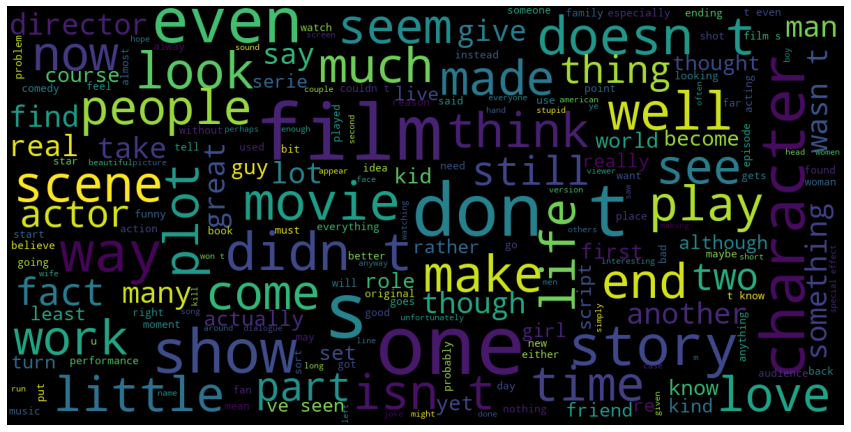

In [11]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=set(STOPWORDS),
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(preprocessed_reviews)

In [12]:
cv = CountVectorizer(stop_words = 'english', analyzer='word')
preprocessed_reviews = pd.Series(preprocessed_reviews)   
pos_cv = cv.fit_transform(preprocessed_reviews[y.isin([1])])

# Visualising the high frequency words for positive feedback
positive_words_fq = pd.DataFrame(pos_cv.sum(axis=0), columns=list(cv.get_feature_names()), index = ['frequency']).T
positive_words_fq.nlargest(10, 'frequency')



,frequency
film,42095
movie,37846
good,15020
great,12961
story,12932
time,12746
really,10736
people,8716
love,8689
best,8509


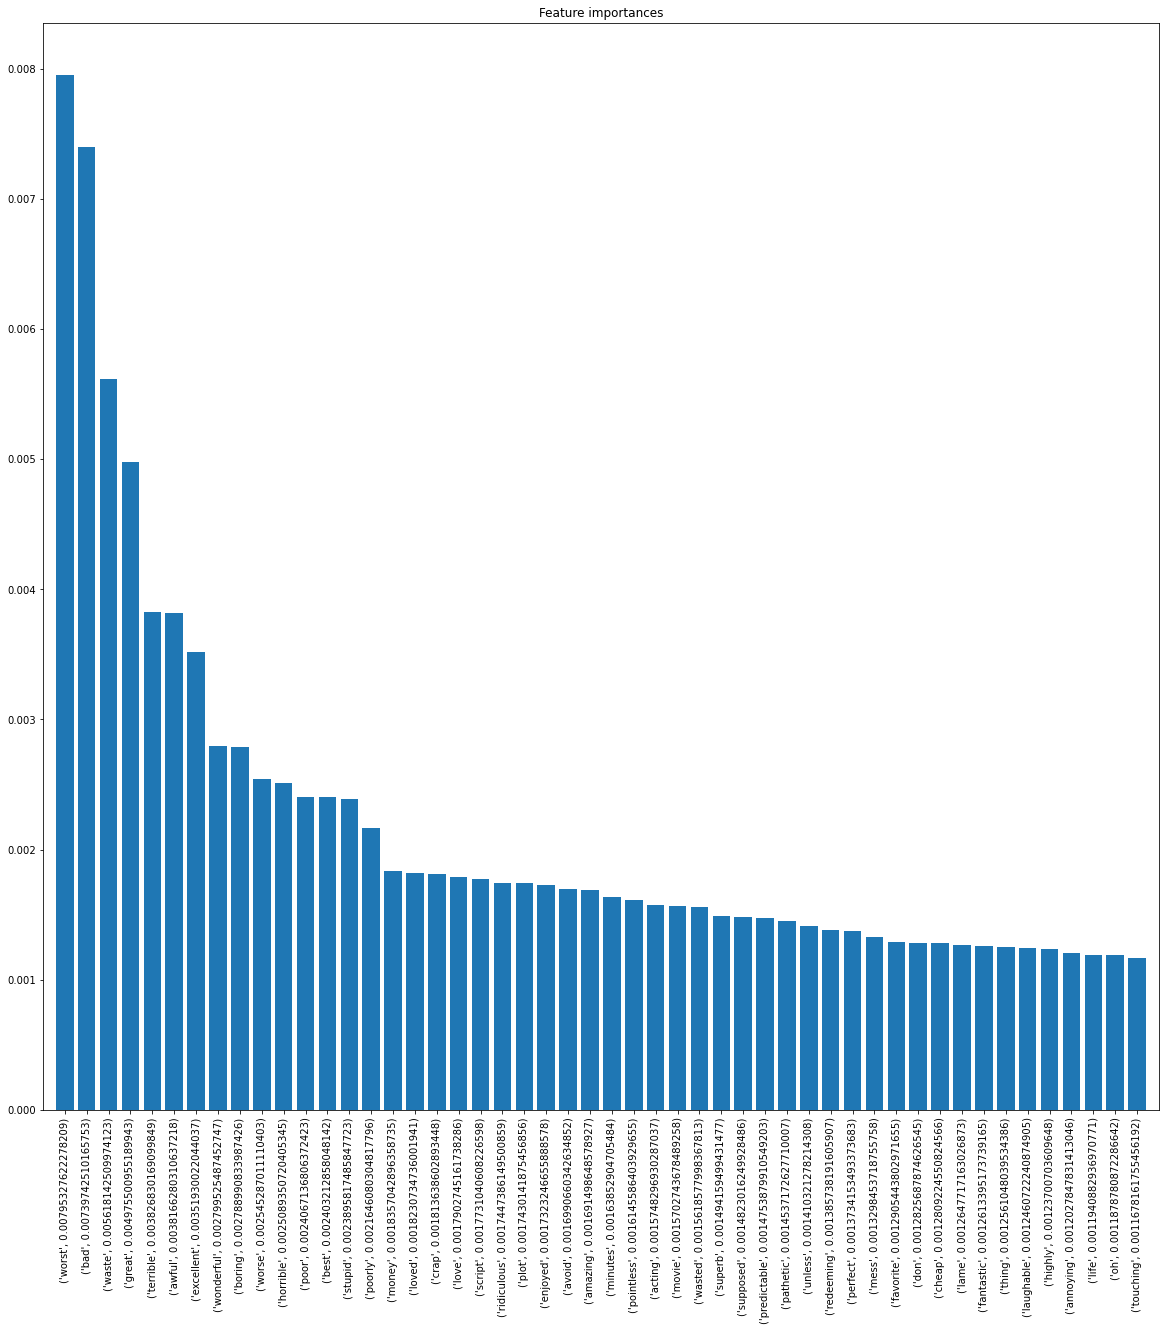

()

In [13]:
def feature_importance():
    
    tree_clf = ExtraTreesClassifier()
    review_cv = cv.fit_transform(preprocessed_reviews)
    tree_clf.fit(review_cv, y)

    importances = tree_clf.feature_importances_
    feature_names = cv.get_feature_names()
    sorted_features = sorted(dict(zip(feature_names, importances)).items(), key=operator.itemgetter(1), reverse=True)
    ind = np.argsort(importances)[::-1]
    
    plt.figure(figsize = (20,20))
    plt.title("Feature importances")
    plt.bar(range(50), importances[ind[:50]], align="center")
    plt.xticks(range(50), sorted_features[:50], rotation=90)
    plt.xlim([-1, 50])
    plt.show()

    return()

feature_importance()